In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr


In [62]:
df = pd.read_excel(r'C:\Users\SAIFULLA SHARIEF\Desktop\MY PROJECTS\P5 - RAISIN - LOGISTIC Reg\Raisin_Dataset.xlsx')

In [63]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [64]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [66]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [67]:
df.columns


Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

### EDA

### TARGET VARIABLE : Class (Discrete)

In [68]:
df.Class.value_counts()

Besni      450
Kecimen    450
Name: Class, dtype: int64

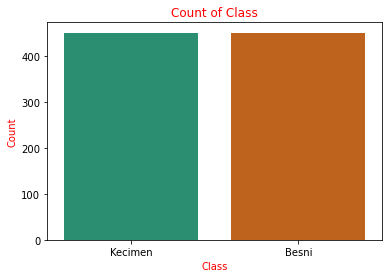

In [69]:
sns.countplot(df.Class,palette='Dark2')
plt.title('Count of Class', color = 'r')
plt.xlabel('Class', color = 'r')
plt.ylabel('Count', color = 'r')
plt.show()

In [70]:
# data is balanced . NO need to perform SMOTE operation

### Predictors

In [71]:
#Distribution plot

In [72]:
x = df.loc[:, df.columns != 'Class']

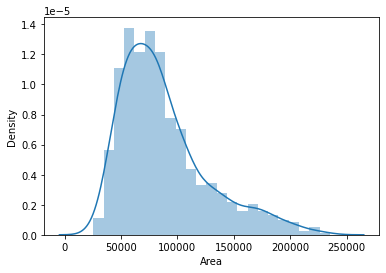

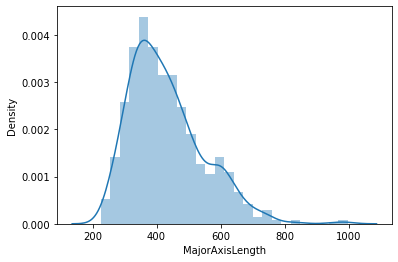

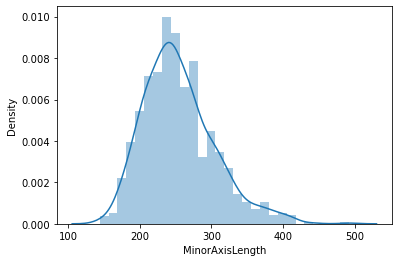

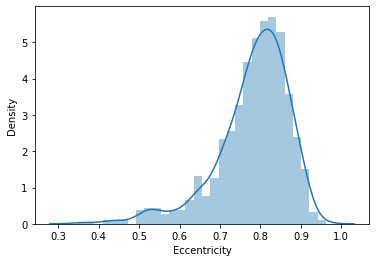

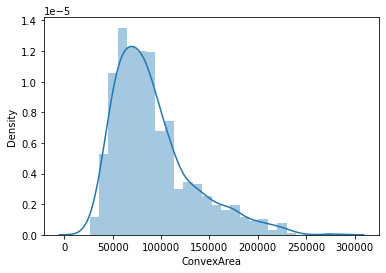

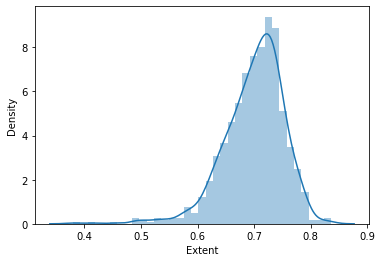

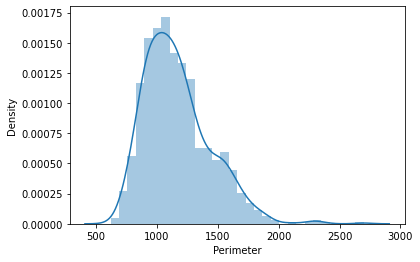

In [73]:
for i in x.columns:
    sns.distplot(df[i])
    plt.show()

### Boxplot 

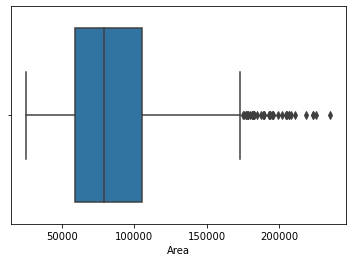

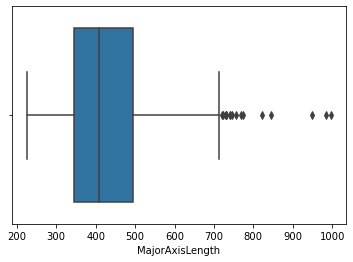

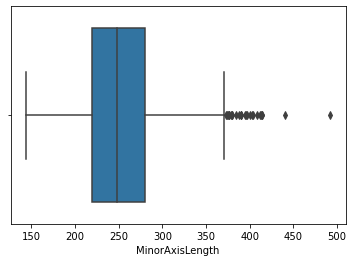

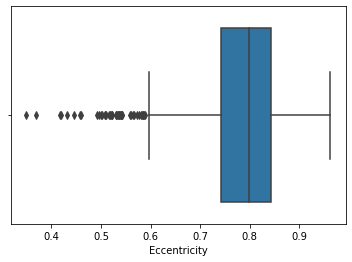

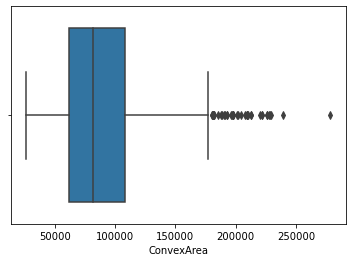

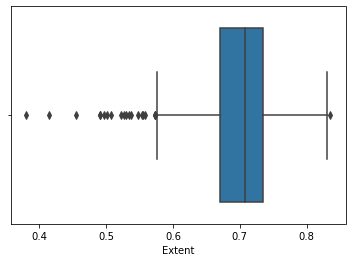

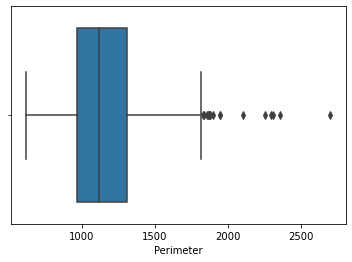

In [74]:
for i in x.columns:
    sns.boxplot(df[i])
    plt.show()

In [75]:
# Since we have outliers in many feautures , let's treat them 

* Area

In [76]:
IQR = df.Area.describe()['75%'] - df.Area.describe()['25%']
up_lim = df.Area.describe()['75%'] + 1.5 * IQR
len(df.Area[df.Area > up_lim])

41

In [77]:
q3 = df.Area.quantile(0.75)
q1 = df.Area.quantile(0.25)
IQR = q3 - q1
ul = q3 + (1.5 * IQR)
ul
outliers = df.Area > ul

In [78]:
# replacing outliers with median
median = df.Area.median()
median


78902.0

In [79]:
df.Area[outliers] = median

<AxesSubplot:xlabel='Area', ylabel='Density'>

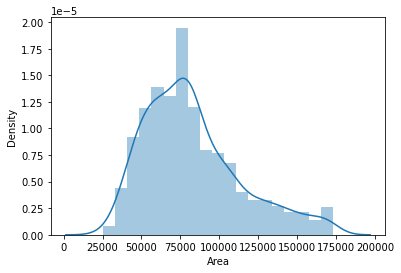

In [80]:
sns.distplot(df.Area)

* Minor Axis length

In [81]:
IQR = df.MinorAxisLength.describe()['75%'] - df.MinorAxisLength.describe()['25%']
up_lim = df.MinorAxisLength.describe()['75%'] + 1.5 * IQR
len(df.MinorAxisLength[df.MinorAxisLength > up_lim])

26

In [82]:
q3 = df.MinorAxisLength.quantile(0.75)
q1 = df.MinorAxisLength.quantile(0.25)
IQR = q3 - q1
ul = q3 + (1.5 * IQR)
ul
outliers = df.MinorAxisLength > ul


In [83]:
median = df.MinorAxisLength.median()
median

247.84840865

In [84]:
df.MinorAxisLength[outliers] = median

* Eccentricity

In [85]:
IQR = df.Eccentricity.describe()['75%'] - df.Eccentricity.describe()['25%']
ll_lim = df.Eccentricity.describe()['25%'] - 1.5 * IQR
len(df.Eccentricity[df.Eccentricity < ll_lim])

43

In [86]:
outliers = df.Eccentricity < ll_lim

In [87]:
median = df.Eccentricity.median()
median

0.798846044

In [88]:
df.Eccentricity[outliers] = median

* MajorAxisLength

In [89]:
q3 = df.MajorAxisLength.quantile(0.75)
q1 = df.MajorAxisLength.quantile(0.25)
IQR = q3 - q1
ul = q3 + (1.5 * IQR)
ul
outliers = df.MajorAxisLength > ul


In [90]:
median = df.MajorAxisLength.median()
median

407.80395115

In [91]:
df.MajorAxisLength[outliers] = median

* convex Area

In [92]:
q3 = df.ConvexArea.quantile(0.75)
q1 = df.ConvexArea.quantile(0.25)
IQR = q3 - q1
ul = q3 + (1.5 * IQR)
ul
outliers = df.ConvexArea > ul


In [93]:
median = df.ConvexArea.median()
median

81651.0

In [94]:
df.ConvexArea[outliers] = median

* Extent

In [95]:
q3 = df.Extent.quantile(0.75)
q1 = df.Extent.quantile(0.25)
IQR = q3 - q1
ll = q1 - (1.5 * IQR)
ll
outliers = df.Extent < ll


In [96]:
median = df.Extent.median()

In [97]:
df.Extent[outliers] = median

* Perimeter

In [98]:
q3 = df.Perimeter.quantile(0.75)
q1 = df.Perimeter.quantile(0.25)
IQR = q3 - q1
ul = q3 + (1.5 * IQR)
ul
outliers = df.Perimeter > ul


In [99]:
median = df.Perimeter.median()

In [100]:
df.Perimeter[outliers] = median 

In [101]:
# Boxplot of features after treating outliers

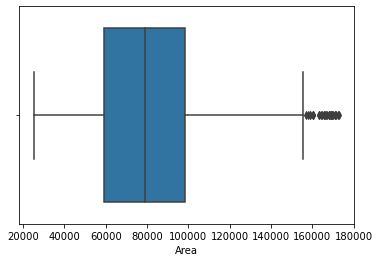

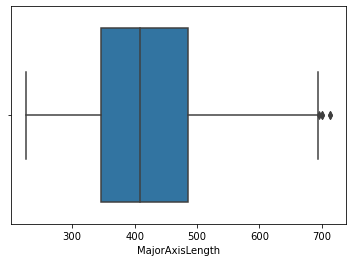

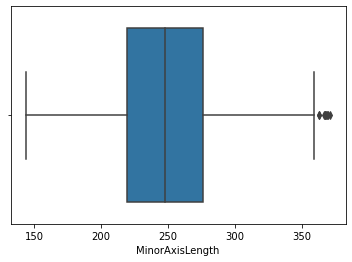

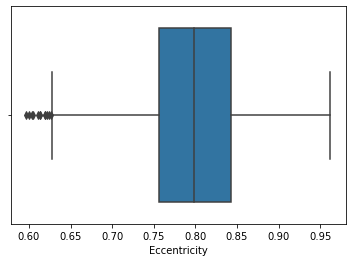

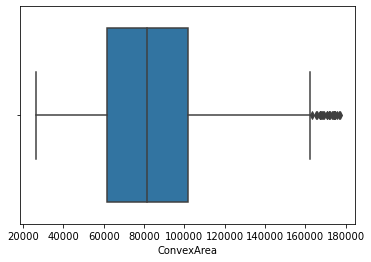

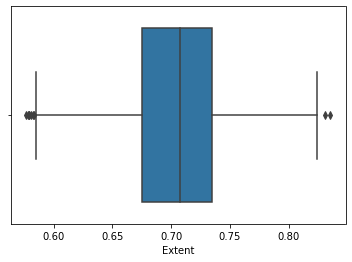

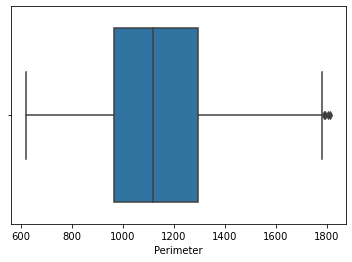

In [102]:
for i in x.columns:
    sns.boxplot(df[i])
    plt.show()

In [103]:
# Distribution plot after replacing outliers with median

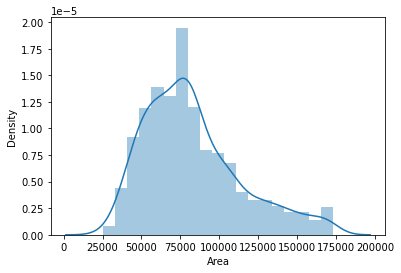

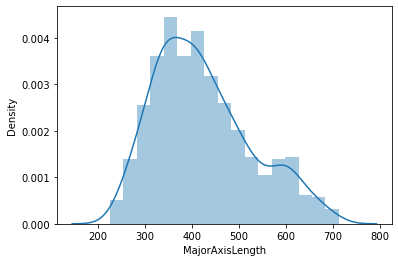

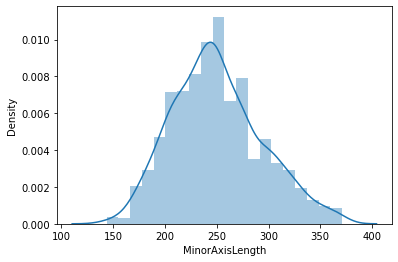

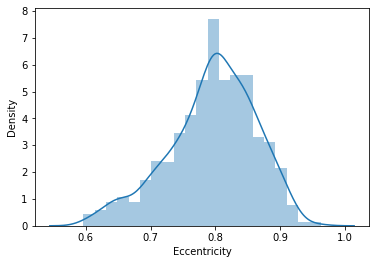

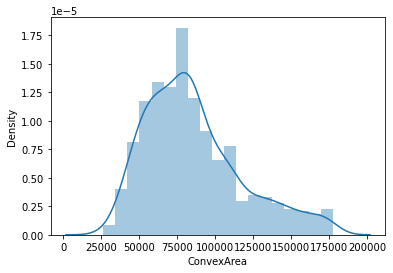

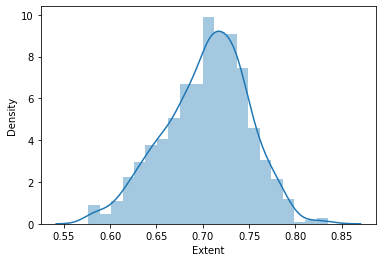

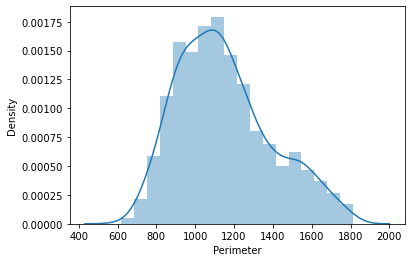

In [104]:
for i in x.columns:
    sns.distplot(df[i])
    plt.show()

In [105]:
df.shape

(900, 8)

In [106]:
# Group by boxplot

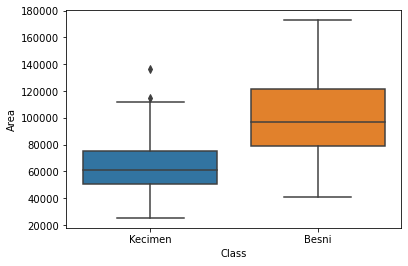

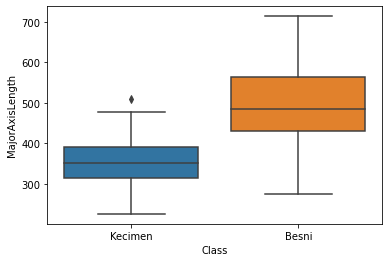

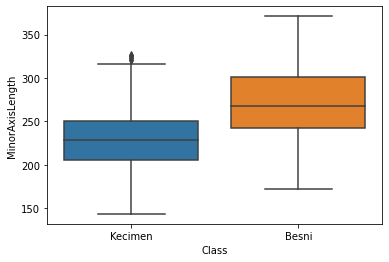

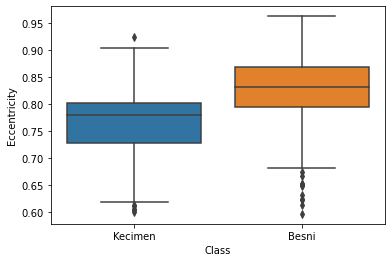

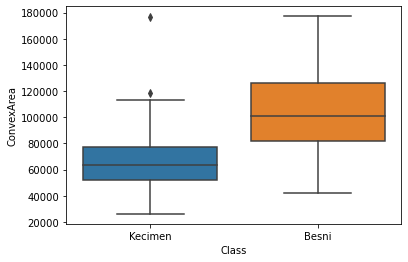

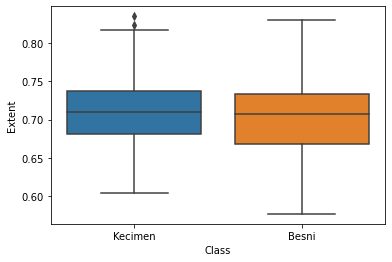

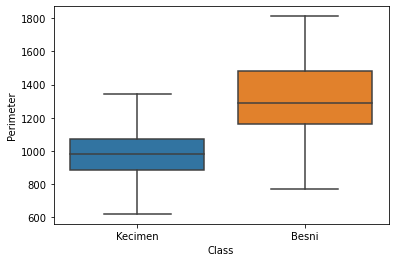

In [107]:
for i in x.columns:
    sns.boxplot(x = 'Class',y= df[i], data = df)
    plt.show()

### Correlation 

In [108]:
predictors = df.loc[:, df.columns != 'Class']


In [109]:
predictors.head()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.798846,81463,0.792772,1073.251


In [110]:
print('                       Correlation matrix\n',x.corr())

                       Correlation matrix
                      Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
Area             1.000000         0.932774         0.906650      0.336107   
MajorAxisLength  0.932774         1.000000         0.728030      0.583608   
MinorAxisLength  0.906650         0.728030         1.000000     -0.027683   
Eccentricity     0.336107         0.583608        -0.027683      1.000000   
ConvexArea       0.995920         0.945031         0.895651      0.348210   
Extent          -0.013499        -0.203866         0.145322     -0.361061   
Perimeter        0.961352         0.977978         0.827417      0.447845   

                 ConvexArea    Extent  Perimeter  
Area               0.995920 -0.013499   0.961352  
MajorAxisLength    0.945031 -0.203866   0.977978  
MinorAxisLength    0.895651  0.145322   0.827417  
Eccentricity       0.348210 -0.361061   0.447845  
ConvexArea         1.000000 -0.054802   0.976612  
Extent            -0.054802  1.000

Text(0.5, 1.0, 'correlation matrix')

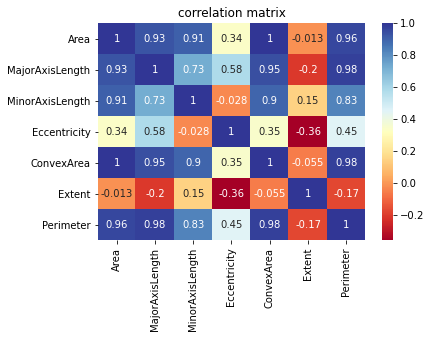

In [111]:
sns.heatmap(x.corr(), cmap = 'RdYlBu', annot = True)
plt.title('correlation matrix')

In [ ]:
# since there is high multicollinearity between Area and Convex area 
# we will drop one among them i.e. Convex area

In [ ]:
# # since there is high multicollinearity between Area and Majoraxis length and minoraxis length 
# we will drop Major axis length

In [112]:
df.drop(['ConvexArea'], axis = 1, inplace = True )

In [114]:
df.drop(['MajorAxisLength'], axis = 1, inplace = True )

In [118]:
df.drop(['MinorAxisLength'], axis = 1, inplace = True )

In [120]:
df.drop(['Perimeter'], axis = 1, inplace = True )

Text(0.5, 1.0, 'correlation matrix')

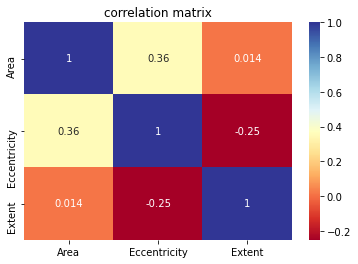

In [121]:
sns.heatmap(df.corr(), cmap = 'RdYlBu', annot = True)
plt.title('correlation matrix')

### Label Encoding

In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
LE = LabelEncoder()

In [124]:
y = df.loc[:, df.columns == 'Class']

In [125]:
y = LE.fit_transform(y)


In [126]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          900 non-null    int64  
 1   Eccentricity  900 non-null    float64
 2   Extent        900 non-null    float64
 3   Class         900 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 28.2+ KB


In [131]:
x = df.loc[:,df.columns != 'Class']
x.head()

,Area,Eccentricity,Extent
0,87524,0.819738,0.758651
1,75166,0.801805,0.684130
2,90856,0.798354,0.637613
3,45928,0.684989,0.699599
4,79408,0.798846,0.792772


In [132]:
import statsmodels.api as sm

In [133]:
logit_model1=sm.Logit(y,x)
result=logit_model1.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.402630
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.419      
Dependent Variable: y                AIC:              730.7340   
Date:               2022-03-06 22:57 BIC:              745.1412   
No. Observations:   900              Log-Likelihood:   -362.37    
Df Model:           2                LL-Null:          -623.83    
Df Residuals:       897              LLR p-value:      2.7989e-114
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Area          -0.0001    0.0000  -13.5392  0.0000  -0.0001  -0.0001
Eccentricity  -5.5483    1.0846   -5.1157  0.0000

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

### MODEL 1 ( using 'liblinear' solver[default])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          900 non-null    int64  
 1   Eccentricity  900 non-null    float64
 2   Extent        900 non-null    float64
 3   Class         900 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 28.2+ KB


In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [148]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[97  0]
 [83  0]]


In [150]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        97
           1       0.00      0.00      0.00        83

    accuracy                           0.54       180
   macro avg       0.27      0.50      0.35       180
weighted avg       0.29      0.54      0.38       180



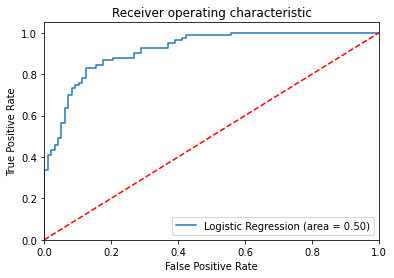

In [151]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### MODEL 2 : Using Newtons - cg solver

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [153]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [154]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[82 15]
 [11 72]]


In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        97
           1       0.83      0.87      0.85        83

    accuracy                           0.86       180
   macro avg       0.85      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



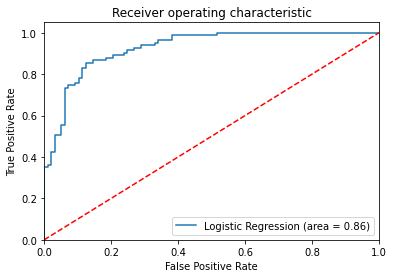

In [156]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model 3 (using 'saga' solver)

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(solver = 'saga')
logreg.fit(x_train, y_train)

LogisticRegression(solver='saga')

In [158]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


In [159]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[97  0]
 [83  0]]


In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        97
           1       0.00      0.00      0.00        83

    accuracy                           0.54       180
   macro avg       0.27      0.50      0.35       180
weighted avg       0.29      0.54      0.38       180



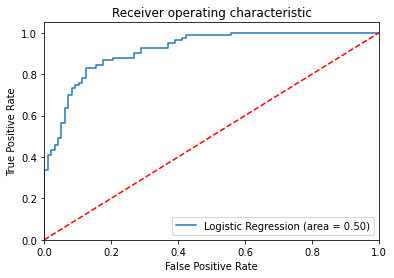

In [161]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model 4. (using 'sag' solver)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(solver = 'sag')
logreg.fit(x_train, y_train)

In [162]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier using sag solver on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier using sag solver on test set: 0.54


In [163]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('confusion matrix\n',confusion_matrix)

confusion matrix
 [[97  0]
 [83  0]]


In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70        97
           1       0.00      0.00      0.00        83

    accuracy                           0.54       180
   macro avg       0.27      0.50      0.35       180
weighted avg       0.29      0.54      0.38       180



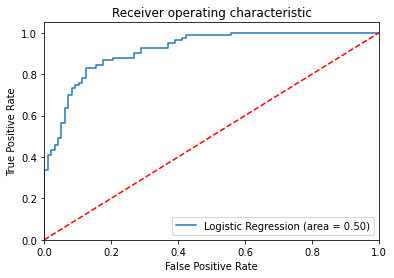

In [165]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# So the winner model is Model 2 ('Newton-CG') with accuracy 86%